In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_MCD = pd.read_csv('dataset\\stock_MCD_ytd', sep=';')
df_MCD.head()

,Date,Open,High,Low,Close,Volume
0,2023-01-03 00:00:00-05:00,259.239921,260.046580,255.285375,260.026886,2743800
1,2023-01-04 00:00:00-05:00,261.915613,262.210717,258.610326,260.085907,2584100
2,2023-01-05 00:00:00-05:00,260.449892,260.449892,257.124911,257.892212,1945600
3,2023-01-06 00:00:00-05:00,259.466185,265.496397,259.102213,265.083221,2855400
4,2023-01-09 00:00:00-05:00,265.535717,265.555411,262.427156,262.899353,2654600


In [3]:
(df_MCD['Close'] - df_MCD['Open'])

0      0.786965
1     -1.829706
2     -2.557680
3      5.617037
4     -2.636364
         ...   
220    5.049988
221   -0.799988
222    3.679993
223    0.600006
224    0.769989
Length: 225, dtype: float64

In [4]:
abs(df_MCD['Close'] - df_MCD['Open'])

0      0.786965
1      1.829706
2      2.557680
3      5.617037
4      2.636364
         ...   
220    5.049988
221    0.799988
222    3.679993
223    0.600006
224    0.769989
Length: 225, dtype: float64

### Simple Moving Average
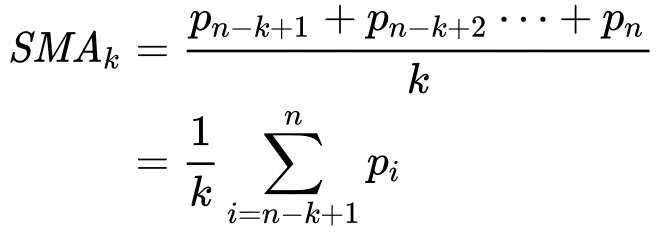

In [5]:
df_MCD[['Close']].rolling(30).mean().head(30)

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


### Cumulative Moving Average
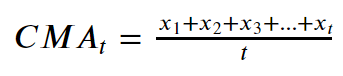

In [6]:
df_MCD['Close'].expanding().mean()

0      260.026886
1      260.056396
2      259.335002
3      260.772057
4      261.197516
          ...    
220    275.786667
221    275.786502
222    275.801046
223    275.821890
224    275.849437
Name: Close, Length: 225, dtype: float64

### Exponential Moving Average
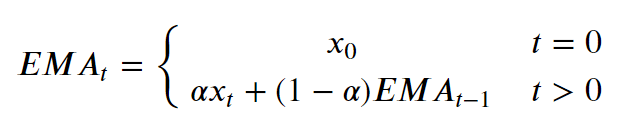

In [7]:
df_MCD['Close'].ewm(span=30).mean()

0      260.026886
1      260.057380
2      259.287026
3      260.884089
4      261.342610
          ...    
220    265.149255
221    265.833174
222    266.684582
223    267.573965
224    268.505966
Name: Close, Length: 225, dtype: float64

<Axes: >

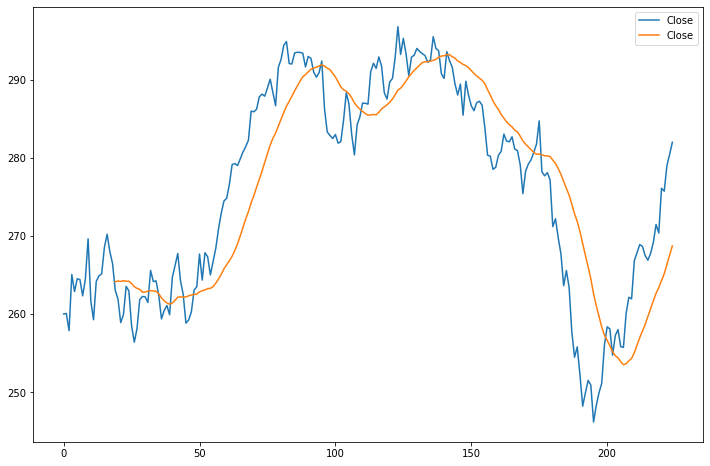

In [8]:
(pd.concat([df_MCD['Close'],df_MCD['Close'].rolling(20).mean()], axis=1)).plot(figsize=(12,8))


### Perubahan harga dalam satu hari

In [9]:
df_MCD['diff'] = (df_MCD['Close'] - df_MCD['Open'])
df_MCD.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03 00:00:00-05:00,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04 00:00:00-05:00,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05 00:00:00-05:00,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06 00:00:00-05:00,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09 00:00:00-05:00,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


### Hapus informasi waktu dari tanggal, ubah type data dari Date menjadi DateTime

In [10]:
# Jangan dijalankan lebih dari 1 kali

df_MCD['Date'] = df_MCD['Date'].str[:10]
df_MCD.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


In [11]:
df_MCD['Date'] = pd.to_datetime(df_MCD['Date'])
df_MCD.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


In [12]:
df_MCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    225 non-null    datetime64[ns]
 1   Open    225 non-null    float64       
 2   High    225 non-null    float64       
 3   Low     225 non-null    float64       
 4   Close   225 non-null    float64       
 5   Volume  225 non-null    int64         
 6   diff    225 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.4 KB


In [13]:
df_MCD.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


In [14]:
df_MCD_tocsv = df_MCD.set_index(['Date'])
df_MCD_tocsv.head()

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


In [15]:
df_MCD_tocsv.to_csv('dataset_clean\\clean_stock_MCD_ytd', sep=';', index= True, header=True) # jangan dijalankan lebih dari 1 kali